In [3]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 23 ##

### Percentiles

In [4]:
x = make_array(43, 20, 51, 7, 28, 34)
y = np.sort(x)
y

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [5]:
0.55 * 6

3.3000000000000003

In [6]:
percentile(55, x)

34

### Bootstrap

In [7]:
sf = Table.read_table('san_francisco_2015.csv')

In [8]:
sf.where('Job', 'Mayor')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,MYR,Mayor,556,Elected Officials,1100,Administrative & Mgmt (Unrep),1190,Mayor,22433,288964,0,0,288964,58117,12424.5,20293,90834.5,379798


In [11]:
10 * 20 * 52   # hours threshold for part time

10400

In [12]:
sf = sf.where('Total Compensation', are.above(10000))

In [13]:
sf.num_rows

38217

In [14]:
percentile(50, sf.column('Total Compensation'))

107219.48

In [15]:
our_sample = sf.sample(300, with_replacement=False)
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2300,Nursing,2303,Patient Care Assistant,16511,69968.1,5913.85,4151.88,80033.8,14564.8,12375.2,6329.35,33269.4,113303
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,4,"Painters, Local 1176",7300,Journeyman Trade,7346,Painter,7573,79722,0,200,79922,16473.6,12424.5,6546.98,35445.1,115367
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,28472,37420.5,1010.93,2994.13,41425.6,8448.97,5734.39,870.21,15053.6,56479.1
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,790,"SEIU - Miscellaneous, Local 1021",1300,Pub Relations & Spec Assts,1324,Customer Service Agent,36584,22990.2,0,247.84,23238.1,1337.13,4659.19,1797.1,7793.42,31031.5
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,50500,66458.1,19280.6,1646.2,87384.9,18634.5,13094.6,6571.47,38300.6,125686
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,40892,111769,39311.1,10667.2,161747,24450.5,15000.5,2656.79,42107.9,203855
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,130,"Automotive Machinists, Local 1414",7300,Journeyman Trade,7313,Automotive Machinist,9556,82853.3,3754.88,9549.41,96157.6,19039.6,12420,7686.35,39146,135304
Calendar,2015,4,Community Health,DPH,Public Health,856,"Teamsters - Miscellaneous, Local 856",2400,"Lab, Pharmacy & Med Techs",2462,Microbiologist,25530,28600,0,0,28600,5322.47,4539.72,2266.43,12128.6,40728.6
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,4,"Painters, Local 1176",7300,Journeyman Trade,7346,Painter,33234,79683.9,9384.53,10,89078.4,16424.2,12418.5,7352.63,36195.4,125274
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1300,Pub Relations & Spec Assts,1314,Public Relations Officer,22638,96254,0,900,97154,20020.2,12424.5,7767.12,40211.9,137366


In [16]:
percentile(50, our_sample.column('Total Compensation'))

108836.88

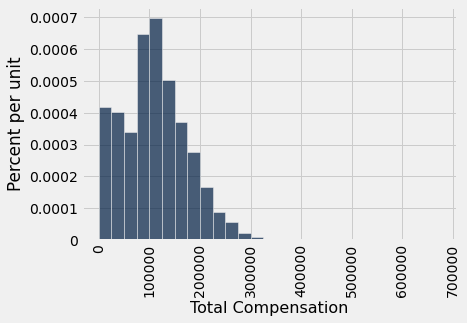

In [19]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

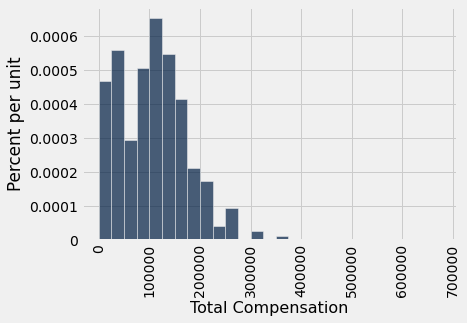

In [20]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [21]:
resample1 = our_sample.sample(300, with_replacement=True)

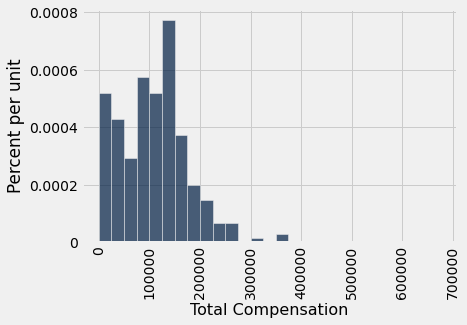

In [22]:
resample1.hist('Total Compensation', bins=sf_bins)

In [23]:
resample2 = our_sample.sample()

In [24]:
percentile(50, resample1.column('Total Compensation'))

111566.03

In [25]:
percentile(50, resample2.column('Total Compensation'))

111491.31

In [26]:
medians = make_array()

for i in np.arange(1000):
    resampled = our_sample.sample()
    median = percentile(50, resampled.column('Total Compensation'))
    medians = np.append(medians, median)

In [27]:
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
        
    return medians

In [28]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 1000)

In [29]:
pop_median = percentile(50, sf.column('Total Compensation'))

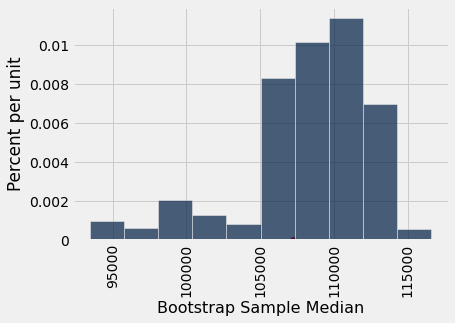

In [30]:
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()

plots.scatter(pop_median, 0, color='red', s=40);

In [31]:
left = percentile(2.5, bstrap_medians)
left

96183.3

In [32]:
right = percentile(97.5, bstrap_medians)
right

113923.18

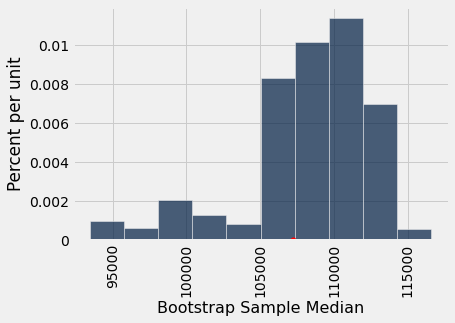

In [33]:
resampled_medians.hist()

plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color='red', s=30, zorder=2);

In [34]:
confidence_interval = make_array(left, right)
confidence_interval

array([ 96183.3 , 113923.18])

In [35]:
# THE BIG SIMULATION: This one takes a long time.

# Generate the endpoints of 50 intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(50):
    first_sample = sf.sample(300, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 2000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

In [36]:
intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [37]:
intervals

Left,Right
97710.2,110681
99459,114328
102244,117930
98795,113998
94261.3,110720
95743.9,114497
96973.1,119535
98635.4,113823
96825.8,113068
93830.4,113958


In [38]:
good = intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

In [39]:
good / 50

0.96